# Diversidade Lexica

In [2]:
import nltk

In [3]:
nltk.download('brown')

[nltk_data] Downloading package brown to /Users/lailson/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [4]:
import numpy as np
import pandas as pd
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [6]:
len(text1)

260819

In [7]:
text1[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [8]:
def frequencia_absoluta(texto):
    palavras_unicas = set(texto)
    print(len(palavras_unicas))
    contagens_palavra = [texto.count(p) for p in palavras_unicas]
    return contagens_palavra

def frequencia_relativa(corpus):
    total_palavras = len(texto)
    palavras_unicas = set(texto)
    return [freq / total_palavras for freq in Counter(corpus).values()]



In [9]:
palavras_unicas = list(set(text1))
palavras_unicas[:10]


['leaping',
 'suspected',
 'pendulous',
 'Dives',
 'Rabbins',
 'enlarged',
 'envious',
 'Look',
 'joking',
 'pounds']

In [10]:
fdist1 = FreqDist(text1)
fdist1

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

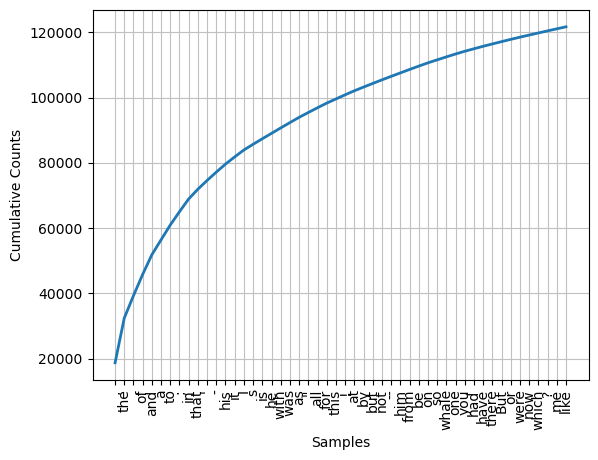

In [11]:
fdist1.plot(50, cumulative=True)

## b) As 30 palavras mais frequentes são informativas para o texto? Qual a proporção do texto é usada com essas palavras?

In [12]:
fdist1 = FreqDist(text1)
fdist1.most_common(30)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103)]

O conjunto de palavras maisk comuns do texto não nos diz muito a respeito do texto. 

In [17]:
fdist1 = FreqDist(text1)
palavras_mais_frequentes = fdist1.most_common(30)
total_palavras = len(text1)

porcentagem_palavras = []
for palavra, freq in palavras_mais_frequentes:
    porcentagem = (freq / total_palavras) * 100
    porcentagem_palavras.append((palavra, round(porcentagem, 2)))

porcentagem_palavras

[(',', 7.17),
 ('the', 5.26),
 ('.', 2.63),
 ('of', 2.51),
 ('and', 2.31),
 ('a', 1.75),
 ('to', 1.74),
 (';', 1.56),
 ('in', 1.5),
 ('that', 1.14),
 ("'", 1.03),
 ('-', 0.98),
 ('his', 0.94),
 ('it', 0.85),
 ('I', 0.81),
 ('s', 0.67),
 ('is', 0.65),
 ('he', 0.64),
 ('with', 0.64),
 ('was', 0.63),
 ('as', 0.62),
 ('"', 0.57),
 ('all', 0.56),
 ('for', 0.54),
 ('this', 0.49),
 ('!', 0.49),
 ('at', 0.47),
 ('by', 0.44),
 ('but', 0.43),
 ('not', 0.42)]

## O que deve ser eliminado para melhorar a lista das palavras frequentes (sinais, números, etc.)?

Para melhorar a lista das palavras frequentes, é recomendável eliminar os
seguintes elementos do texto:

1. **Sinais de pontuação**: vírgulas (,), pontos (.), ponto e vírgula
(...), travessas (/), barra invertida (\), etc.
2. **Números**: todos os números inteiros e decimais, incluindo datas e
horas.
3. **Caracteres especiais**: símbolos como @,#,$,%,^,*,+,=,{,[,},],~,|,
etc.
4. **stopword** Remover palavras como da, de, do, que, para, etc. Essas palavras são conhecidas como stopword

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lailson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
import re
from nltk.corpus import stopwords
palavras = text1[:]

palavras_sem_numeros = [p for p in palavras if not bool(re.match(r'\d', p))]
#stop_words = {'da', 'de', 'do', 'para', 'que', 'o', 'a', 'em'}
stop_words = set(stopwords.words())
palavras_sem_stopwords_e_caracteres_especiais = [p for p in palavras_sem_numeros if not bool(re.match(r'[^a-zA-Z\s]', p)) and p.lower() not in stop_words]
palavras_sem_stopwords_e_caracteres_especiais[:20]

['Moby',
 'Dick',
 'Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Late',
 'Consumptive',
 'Usher',
 'Grammar',
 'School',
 'pale',
 'Usher',
 'threadbare',
 'coat',
 'heart',
 'body',
 'brain',
 'dusting',
 'lexicons']

## Os hapaxes ajudam a entender o texto? E os collocations? Que outras propriedades poderiam ser consideradas?

Sim, os hapaxes (palavras que aparecem apenas uma vez no texto), os collocations (combinações de
palavras que ocorrem frequentemente juntas) e outras propriedades podem ajudar a entender melhor o
texto.

In [22]:
# Hapaxes (palavras que aparecem apenas uma vez)
hapaxes = [p for p in set(palavras_sem_stopwords_e_caracteres_especiais) if palavras_sem_stopwords_e_caracteres_especiais.count(p) == 1]
print("\nHapaxes:")
print(hapaxes[:10])



Hapaxes:
['Rabbins', 'envious', 'joking', 'persecutions', 'smiled', 'Sahara', 'Fill', 'Advance', 'Stealing', 'slavery']


Review 1 on computing with language. How many words are there in text2? How many distinct words are there?

In [2]:
import numpy as np
import pandas as pd
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>